# Solución a la tarea 1 de estadística 3

Todas las soluciones son el resultado a las preguntas realizadas en el PDF que está adjunto en la carpeta llamada **doc** que hace parte de la carpeta llamada **tarea 1**.

1. Utilizas el siguiente set de datos para calcular paso por paso (mostrar
procedimiento y fórmulas):
![set de datos para solucionar los ejercicios](setdatos.png)

**1.1. ¿Cuál es la media, mediana y desviación estándar?, y la moda y los valores repeticiones de la moda para los datos categóricos.**

Este punto lo desarrollé de dos maneras, una es a mano y otra con python. Para ver las soluciones a mano debe de ir a la carpeta **doc**. 

Para calcular la **media**, **moda**, **mediana**, **desviación estándar** y los **valores repeticiones de la moda** debo:

**Identificar las variables categóricas.**

Por lo aprendido en cursos anteriores la única variable categórica es **City**, pero en este punto entra un "sin sentido" a la pregunta, y es ¿ Puedo calcular estos estadísticos descriptivos a
las variables categóricas? y la respuesta es no, o bueno, podría calcular la moda, pero para este caso no tiene sentido, porque ninguna ciudad se repite en el set de datos.

Para no dejar sin respuesta al punto, voy a ver la pregunta como variables **cuantivativas** y calcularle los estadísticos. Pero repito al no tener ciudades repetidas en el  set de datos,
entonces voy analizar el dataSet de otra manera, sé que todas son ciudades de Colombia, entonces voy a calcular los diferentes estadísticos a cada una de las columnas.

In [1]:
# Importamos las librerías necesarias
import pandas as pd
import numpy as np
import random
import math
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
import scipy.spatial.distance as ssd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import os
import re
import zipfile
from urllib.request import urlretrieve
from os.path import isfile
from PIL import Image
import plotly.express as px
from scipy import stats
from scipy.stats import shapiro, normaltest
from openpyxl import Workbook, load_workbook
from openpyxl.utils.dataframe import dataframe_to_rows





#Cargamos el archivo
df = pd.read_excel('Punto1.xlsx')

## Calcular la media
media = df.iloc[:, 1:].mean()
media





GDP (USD Billion)         8.750000
Population (Millions)     0.731667
Unemployment Rate (%)    13.833333
Average Age              29.233333
Women (%)                51.466667
Men (%)                  48.533333
Budget (USD Billion)      1.653333
dtype: float64

In [2]:
#Calcular la mediana
mediana = df.iloc[:, 1:].median()
mediana

GDP (USD Billion)         2.65
Population (Millions)     0.39
Unemployment Rate (%)    13.45
Average Age              29.00
Women (%)                51.00
Men (%)                  49.00
Budget (USD Billion)      0.65
dtype: float64

In [3]:
#Calcular la desviación estándar
desviacionEstandar = df.iloc[:,1:].std()
desviacionEstandar

GDP (USD Billion)        19.914433
Population (Millions)     1.352566
Unemployment Rate (%)     2.945052
Average Age               2.238893
Women (%)                 0.776079
Men (%)                   0.776079
Budget (USD Billion)      3.450186
dtype: float64

In [4]:
#Calcular la moda
moda = df.mode().iloc[0]
moda

City                     Arauca (test)
GDP (USD Billion)                  0.6
Population (Millions)             0.01
Unemployment Rate (%)              9.2
Average Age                       29.0
Women (%)                         51.0
Men (%)                           49.0
Budget (USD Billion)               0.1
Name: 0, dtype: object

In [5]:
#Calculas las Repeticiones de la Moda

#Función para calcular las repeticiones de la moda
def calcularRepeticiones(columna):
    return columna.value_counts()

repeticionesModa = df.iloc[:,1:].apply(calcularRepeticiones).max()
repeticionesModa


GDP (USD Billion)         1.0
Population (Millions)     2.0
Unemployment Rate (%)     1.0
Average Age               6.0
Women (%)                15.0
Men (%)                  15.0
Budget (USD Billion)      3.0
dtype: float64

**1.2. Dibujar un boxplot a mano. Utilizando los datos de la tabla 1 y las siguientes proporciones**

A pesar de qué me dice que lo dibuje a mano, también quiero dejar este proyecto como algo público en Github, entonces la solución también quiero plantearla con python

Como esto es una solución que no se relaciona con el trabajo, entonces la desarrollaré de acuerdo a mí intención:

**BloxPlot**

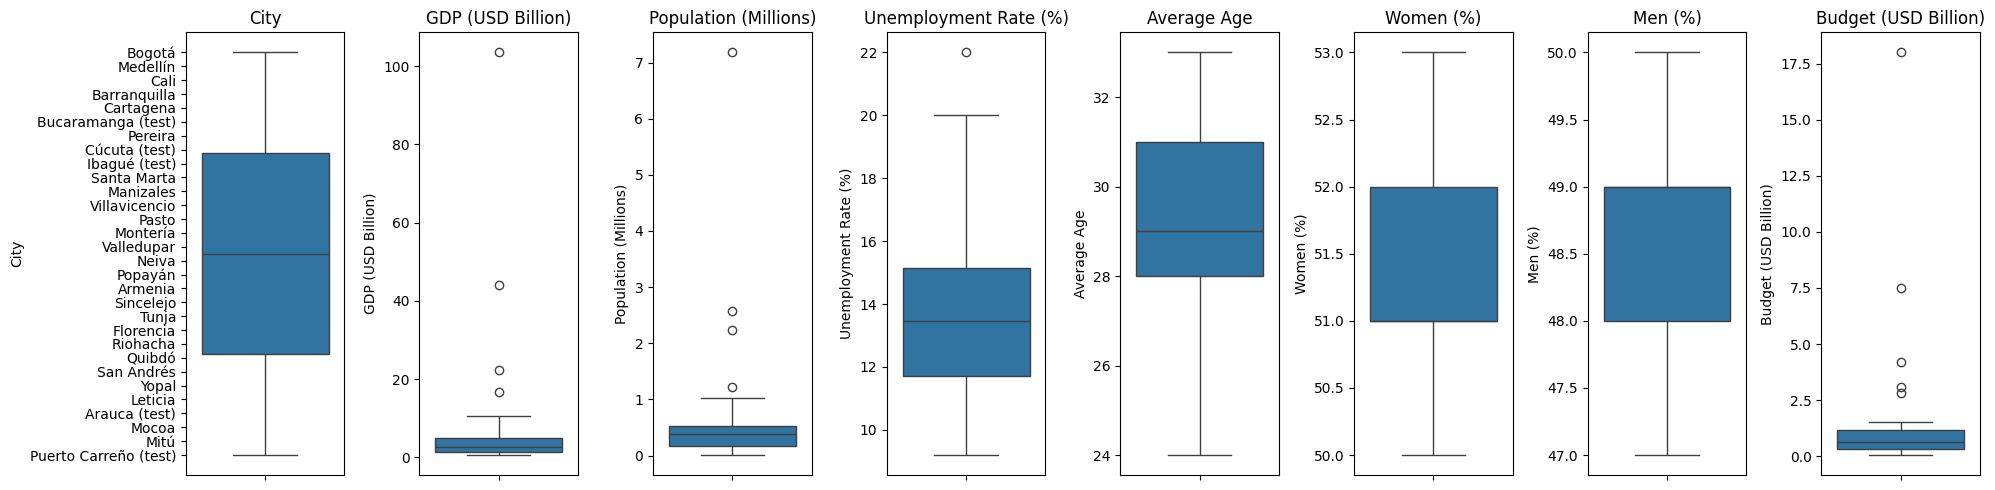

In [6]:
fig, axs = plt.subplots(1, len(df.columns), figsize=(20,5))
for i, column in enumerate(df.columns):
    sns.boxplot(y=df[column], ax=axs[i])
    axs[i].set_title(column)
plt.tight_layout()
plt.show()

**1.3. Cuál es la covarianza entre las 2 variables X1, X2**

En este punto no hay especificación entre qué variables debo de realizar una covarianza, pero aprovecho que python me permite ver la covarancia que hay entre todos los datos


In [7]:
# Calcula la matriz de covarianza
cov_matrix = df.iloc[:,1:].cov()
cov_matrix


,GDP (USD Billion),Population (Millions),Unemployment Rate (%),Average Age,Women (%),Men (%),Budget (USD Billion)
GDP (USD Billion),396.584655,26.680362,-19.123103,15.087931,4.458621,-4.458621,68.592931
Population (Millions),26.680362,1.829435,-1.340264,1.104080,0.291954,-0.291954,4.637839
Unemployment Rate (%),-19.123103,-1.340264,8.673333,-5.232184,-1.002299,1.002299,-3.478046
Average Age,15.087931,1.104080,-5.232184,5.012644,1.197701,-1.197701,2.757816
Women (%),4.458621,0.291954,-1.002299,1.197701,0.602299,-0.602299,0.769080
Men (%),-4.458621,-0.291954,1.002299,-1.197701,-0.602299,0.602299,-0.769080
Budget (USD Billion),68.592931,4.637839,-3.478046,2.757816,0.769080,-0.769080,11.903782


Cuando calculamos la podemos notar por ejemplo que entre GDP y Budget es positiva, es decir, a medida que crece una la otra también aumenta, como tal el gráfico anterior me muestra la matriz de covarancia que hay entre cada columna del set de datos(omitiendo city), pero también podemos aprovecharnos de que python nos permite visualizar la covarancia entre dos columnas rápidamente

In [8]:
# Ejemplo: covarianza entre 'Columna1' y 'Columna2'
cov_col1_col2 = cov_matrix.loc['GDP (USD Billion)', 'Budget (USD Billion)']
print(f'Covarianza entre Columna1 y Columna2: {cov_col1_col2}')

Covarianza entre Columna1 y Columna2: 68.59293103448276


Pero también podemos decir que hay una covarancia negativa entre GDP y Unemployment rate, lo que quiere decir, que a medida de que una aumenta la otra disminuye, todo esto ya con un análisis más focalizado nos permite decidir

**1.4. Cuál es la correlación entre la variable x1 y x2 (Calcularla a mano):**

Del mismo modo que pasó con el boxplot, acá también es una decisión propia de querer agregar este procedimiento adicional en el nootebook, pero no lo explicaré porque la pregunta no lo sugiere.


In [9]:
#Calcular la correlación
correlacion = df.iloc[:,1:].corr()
correlacion

,GDP (USD Billion),Population (Millions),Unemployment Rate (%),Average Age,Women (%),Men (%),Budget (USD Billion)
GDP (USD Billion),1.000000,0.990525,-0.326060,0.338398,0.288487,-0.288487,0.998318
Population (Millions),0.990525,1.000000,-0.336464,0.364593,0.278131,-0.278131,0.993836
Unemployment Rate (%),-0.326060,-0.336464,1.000000,-0.793518,-0.438529,0.438529,-0.342294
Average Age,0.338398,0.364593,-0.793518,1.000000,0.689301,-0.689301,0.357017
Women (%),0.288487,0.278131,-0.438529,0.689301,1.000000,-1.000000,0.287226
Men (%),-0.288487,-0.278131,0.438529,-0.689301,-1.000000,1.000000,-0.287226
Budget (USD Billion),0.998318,0.993836,-0.342294,0.357017,0.287226,-0.287226,1.000000


acá ya solo sería interpretar según la teoría, es decir, ver si es -1, 1 o 0 , pero también puedo aprovechar que puedo ver la correlación entre dos variables rápidamente, como por ejemplo

In [10]:
correlacionEntreVariables = df['GDP (USD Billion)'].corr(df['Budget (USD Billion)'])
print(correlacionEntreVariables)

0.9983180711500175


**1.5. Explica la relación entre covarianza y correlación.**

Acá ya podemos ir haciendonos una idea desde que analizamos la covarianza y la correlación entre Budget (USD Billion) y GDP (USD Billion), pero como en clase una vez se nos explicó, la covarianza puede ser sensible a la escala, mientras que la correlación al ser normalizada nos ofrece mejor interpretación sobre la relación que hay entre las variables y en qué dirección.

Pero ya siendo un pocos más técnicos la covarianza da una idea de la dirección del cambio entre dos variables, y la correlación la dirección y la fuerza de ese cambio, de una manera más comprensible.




**1.6. Calcule el resultado del algoritmo K-means sobre este set de datos a mano como lo hicimos en excel o con python sin utilizar librerias. Vamos a crear 6 grupos, es decir, k=6 ( clusters).**

Cuando dicen que calcular a mano se refiere a no utilizar librerías, o aplicaciones que realizen los procedimientos, es decir, tratar de desarrollar todos los procedimientos casi que a conciencia, entonces para este caso lo que tocaba es mostrar como se puede desarrollar este proceso sin necesidad de la librería que nos ofrece python

In [11]:
##Debo cambiar el archivo que se está leyendo para poder hacer el test

df = pd.read_csv('train.csv')

# Columnas numéricas que se usarán para K-Means
datos = df.iloc[:, 1:].values 

#Inicializar centroides aleatoriamente
def inicializarCentroides(datos, k):
    return random.sample(list(datos), k)

#Distancia euclidiana entre dos puntos
def distancia_euclidiana(a, b):
    return math.sqrt(sum((x - y) ** 2 for x, y in zip(a, b)))

#Asignar cada punto al centroide más cercano
def asignarClusters(datos, centroides):
    clusters = []
    distancias = []  # Guardar las distancias para cada punto a cada centroide
    for punto in datos:
        distanciasACentroides = [distancia_euclidiana(punto, centroide) for centroide in centroides]
        distancias.append(distanciasACentroides)
        clusters.append(distanciasACentroides.index(min(distanciasACentroides)))  # El índice del centroide más cercano
    return clusters, distancias

#Recalcular centroides
def actualizarCentroides(datos, clusters, k):
    nuevosCentroides = []
    for i in range(k):
        puntosEnCluster = [datos[j] for j in range(len(datos)) if clusters[j] == i]
        if puntosEnCluster:
            nuevoCentroid = np.mean(puntosEnCluster, axis=0)
            nuevosCentroides.append(nuevoCentroid)
        else:
            nuevosCentroides.append(random.choice(datos))  # Si no hay puntos en un cluster, reasigna aleatoriamente
    return nuevosCentroides

#Guardar resultados en una misma hoja Excel
def guardarResultadosEnExcel(df, centroides, distancias, clusters, iteracion, nombreArchivo='kmeans_competencia.xlsx'):
    # Guardar distancias en el DataFrame
    for i, centroide in enumerate(centroides):
        df[f'dis_C{i}'] = [dist[i] for dist in distancias]
    
    # Guardar los clusters
    df['Cluster'] = clusters

    # Crear un DataFrame para los centroides
    columnas = [f'Feature_{i}' for i in range(datos.shape[1])]
    dfCentroides = pd.DataFrame(centroides, columns=columnas)

    # Cargar o crear el archivo Excel
    try:
        libro = load_workbook(nombreArchivo) 
    except FileNotFoundError:
        libro = Workbook()
        hoja = libro.active
        hoja.title = "Resultados KMeans"
    except Exception as e:
        print(f"Error al cargar el archivo: {e}")
        libro = Workbook()
        hoja = libro.active
        hoja.title = "Resultados KMeans"

    hoja = libro.active

    # Insertar el título de la iteración
    hoja.append([f"Iteración {iteracion}"])
    hoja.append([])

    # Agregar la tabla de datos
    for fila in dataframe_to_rows(df, index=False, header=True):
        hoja.append(fila)

    # Insertar un título para la tabla de centroides
    hoja.append([f"Centroides Iteración {iteracion}"])
    hoja.append([])

    # Agregar la tabla de centroides
    for fila in dataframe_to_rows(dfCentroides, index=False, header=True):
        hoja.append(fila)
    
    # Guardar cambios
    libro.save(nombreArchivo)
    libro.close()

# Paso 7: Implementar el algoritmo K-Means
def kmeansConExcel(datos, df, k, maxIteraciones=100, nombreArchivo='kmeans_competencia.xlsx'):
    centroides = inicializarCentroides(datos, k)
    
    for iteracion in range(maxIteraciones):
        clusters, distancias = asignarClusters(datos, centroides)
        nuevosCentroides = actualizarCentroides(datos, clusters, k)
        
        # Guardar los resultados en un archivo Excel (una sola hoja)
        guardarResultadosEnExcel(df.copy(), centroides, distancias, clusters, iteracion, nombreArchivo)
        
        # Verificar si los centroides cambiaron
        if np.allclose(centroides, nuevosCentroides):
            print(f"Convergencia alcanzada en la iteración {iteracion}")

            # Guardar los centroides finales en un archivo CSV
            dfCentroides = pd.DataFrame(nuevosCentroides, columns=[f'Feature_{i}' for i in range(datos.shape[1])])
            dfCentroides.to_csv('centroides_finales.csv', index=False)
            break
        
        centroides = nuevosCentroides
k = 6
kmeansConExcel(datos, df, k)


Convergencia alcanzada en la iteración 9


Ahora toca revisar si el entrenamiento del modelo está bien hecho, y lo corroboramos revisando el excel que nos dejó el profesor para realizar el test

In [12]:
# Función para normalizar los datos usando normalización Min-Max
def normalizacionMinMax(datos):
    datos_normalizados = []
    for caracteristica in datos.T: 
        valor_minimo = min(caracteristica)
        valor_maximo = max(caracteristica)
        caracteristica_normalizada = [(x - valor_minimo) / (valor_maximo - valor_minimo) for x in caracteristica]
        datos_normalizados.append(caracteristica_normalizada)
    return np.array(datos_normalizados).T 


centroides = pd.read_csv('centroides_finales.csv').values

# Paso 2: Cargar los datos de prueba
dfPrueba = pd.read_csv('test.csv')

# Columnas numéricas que se usaron para K-Means
datosPrueba = dfPrueba.iloc[:, 1:].values 

datosPruebaNormalizados = normalizacionMinMax(datosPrueba)
centroidesNormalizados = normalizacionMinMax(centroides) 


# Paso 4: Predecir la ciudad más cercana a cada punto de prueba
def predecirCentroideMasCercano(datosPrueba, centroides, ciudades):
    predicciones = []
    for ciudad in datosPrueba:
        # Calcular la distancia de la ciudad de prueba a todos los centroides
        distancias = [distancia_euclidiana(ciudad, centroide) for centroide in centroides]
        
        # Encontrar el índice del centroide más cercano
        indiceCentroideCercano = np.argmin(distancias)
        
        # Obtener la ciudad correspondiente a ese centroide
        ciudadCercana = ciudades[indiceCentroideCercano]
        
        # Guardar la predicción
        predicciones.append(ciudadCercana)
    
    return predicciones

# Suponiendo que las ciudades del entrenamiento están en la columna 'City' de tu conjunto de entrenamiento
ciudades = df['City'].values

# Hacer las predicciones para los datos de prueba
dfPrueba['etiqueta'] = predecirCentroideMasCercano(datosPruebaNormalizados, centroidesNormalizados, ciudades)
dfPrueba['ID'] = dfPrueba['City'] 

# Paso 5: Crear el archivo de envío en el formato requerido por Kaggle
dfEnvio = dfPrueba[['ID', 'etiqueta']]

# Guardar el archivo CSV para Kaggle
dfEnvio.to_csv('kmeans_jose_miguel_posada.csv', index=False)


**1.7. Calcula el resultado de un dendograma utilizando la distancia maxima en python.**


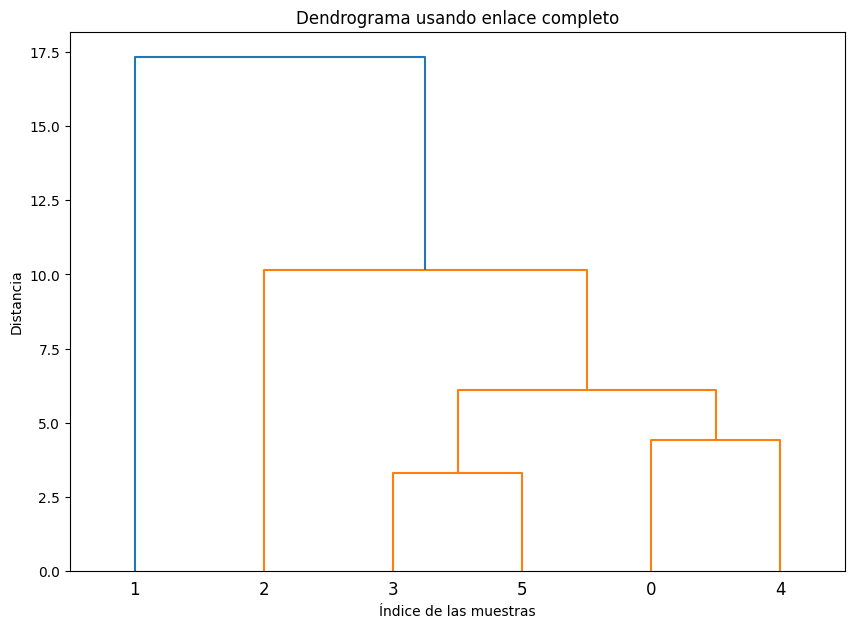

In [13]:
# Cargar el archivo CSV
test_df = pd.read_csv('test.csv')

# Convertir DataFrame a numpy array
data = test_df.iloc[:, 1:].values 

# Calcular la matriz de distancias
distance_matrix = ssd.pdist(data, metric='euclidean')

# Realizar el clustering jerárquico utilizando enlace completo
linkage_matrix = sch.linkage(distance_matrix, method='complete')

# Crear y visualizar el dendrograma
plt.figure(figsize=(10, 7))
sch.dendrogram(linkage_matrix)
plt.title('Dendrograma usando enlace completo')
plt.xlabel('Índice de las muestras')
plt.ylabel('Distancia')
plt.show()

**2. PCA. Utilizar los datos de la tabla 1, para calcular PCA y reducir la dimensionalidad de 2 dimensiones a 1. Para este ejercicio se debe utilizar las variables GDP (USD Billion) y Population (Millions) para crear un vector con una sola dimensión.**





In [14]:
# Seleccionamos las dos variables que plantea el ejercicio
datos_seleccionados = df[['GDP (USD Billion)', 'Population (Millions)']]

# Normalización de los datos
escalador = StandardScaler()
datos_normalizados = escalador.fit_transform(datos_seleccionados)

# Aplicamos PCA para reducir la dimensionalidad a una sola dimensión
pca = PCA(n_components=1)
datos_reducidos = pca.fit_transform(datos_normalizados)
print(datos_reducidos)



[[-0.41023305]
 [-0.57697931]
 [-0.37625754]
 [-0.65446131]
 [-0.53163292]
 [ 0.10873622]
 [ 0.41132729]
 [-0.62389134]
 [-0.49765741]
 [-0.41363859]
 [-0.58011059]
 [-0.35024737]
 [-0.48145248]
 [-0.67550029]
 [ 6.12130321]
 [ 1.95136716]
 [-0.62702262]
 [-0.40029068]
 [-0.55267191]
 [-0.5186964 ]
 [-0.29767851]
 [-0.70464175]
 [ 1.07776382]
 [-0.39743365]]


**2.1. Cuál es la matriz de covarianza**

In [15]:
cov = datos_seleccionados.cov()
cov

,GDP (USD Billion),Population (Millions)
GDP (USD Billion),488.404565,32.747989
Population (Millions),32.747989,2.232700


**2.2 Cuales son los eigenvalues**


In [16]:
cov_array = cov.values
eigenvalores, eigenvectores = np.linalg.eig(cov_array)
print(eigenvalores)


[4.90600514e+02 3.67508628e-02]


**Valor Alto (3.98379741e+02):** 
Este eigenvalor es significativamente mayor que el segundo eigenvalor. Indica que hay una dirección en los datos (representada por el correspondiente eigenvector) en la que hay una alta variabilidad. Esta dirección es la principal componente principal en PCA y explica la mayor parte de la varianza de los datos.

**Valor Bajo (3.43495160e-02):**
Este eigenvalor es muy pequeño en comparación con el primero. Indica que la varianza en esta dirección es mucho menor. La dirección correspondiente a este eigenvalor (su eigenvector) explica poca varianza en los datos.

**2.3. Cuál es la varianza explicada por el eigenvalue**

In [17]:
# Varianza total
varianza_total = np.sum(eigenvalores)

# Varianza explicada por cada componente
varianza_explicada = eigenvalores / varianza_total

print("Varianza total:", varianza_total)
print("Varianza explicada por cada componente:")
print(varianza_explicada)

Varianza total: 490.63726503623184
Varianza explicada por cada componente:
[9.99925096e-01 7.49043447e-05]


Estos resultados son indicativos de que el primer componente principal es muy significativo para representar la variabilidad en los datos, mientras que el segundo componente tiene una contribución menor.

**2.4. Cuál es el valor del eigenvector**


In [18]:
print(eigenvectores)

[[ 0.9977593  -0.06690574]
 [ 0.06690574  0.9977593 ]]


El primer eigenvector indica que el primer componente principal está principalmente alineado con la variable GDP (USD Billion), ya que su valor elevado en la primera posición sugiere que esta variable tiene una mayor influencia en la dirección del componente. En contraste, el segundo eigenvector muestra que el segundo componente principal está alineado predominantemente con la variable Population (Millions), evidenciado por su gran magnitud en la segunda posición. La pequeña magnitud del primer eigenvector en la segunda posición y la del segundo eigenvector en la primera posición  revelan que cada componente tiene una contribución menor en la dirección de la variable opuesta.

**2.5. Cuál es la matriz proyectada.**


In [19]:
# Calcular la matriz proyectada
matriz_proyectada = np.dot(datos_normalizados, eigenvectores)

# Mostrar la matriz proyectada
print("Matriz proyectada:")
print(matriz_proyectada)

Matriz proyectada:
[[-0.33677243 -0.23806892]
 [-0.42569437 -0.38969615]
 [-0.32064983 -0.20489135]
 [-0.44593351 -0.48426333]
 [-0.39989063 -0.35031602]
 [ 0.02642335  0.13497743]
 [ 0.32611941  0.25191577]
 [-0.44734363 -0.4362066 ]
 [-0.38376803 -0.31713844]
 [-0.35430515 -0.22318977]
 [-0.4173854  -0.40395679]
 [-0.29667566 -0.19279549]
 [-0.37362949 -0.30411482]
 [-0.45652944 -0.50410802]
 [ 4.59676507  4.04232751]
 [ 1.6464523   1.08151243]
 [-0.43903466 -0.45046725]
 [-0.31001596 -0.25356658]
 [-0.41048656 -0.37016071]
 [-0.39436397 -0.33698314]
 [-0.19704396 -0.22688334]
 [-0.47219464 -0.53046453]
 [ 0.63012381  0.91670426]
 [-0.34416661 -0.21016615]]


**2.6. Cuál es el error o diferencia entre la matriz proyectada**

In [20]:
error = datos_seleccionados - matriz_proyectada
error

,GDP (USD Billion),Population (Millions)
0,3.536772,0.688069
1,1.925694,0.609696
2,3.820650,0.704891
3,1.645934,0.564263
4,2.399891,0.630316
5,10.473577,0.895023
6,16.473881,0.978084
7,1.547344,0.586207
8,2.683768,0.647138
9,3.154305,0.693190


**2.7. Pintar todas las ciudades en 1 dimension.**


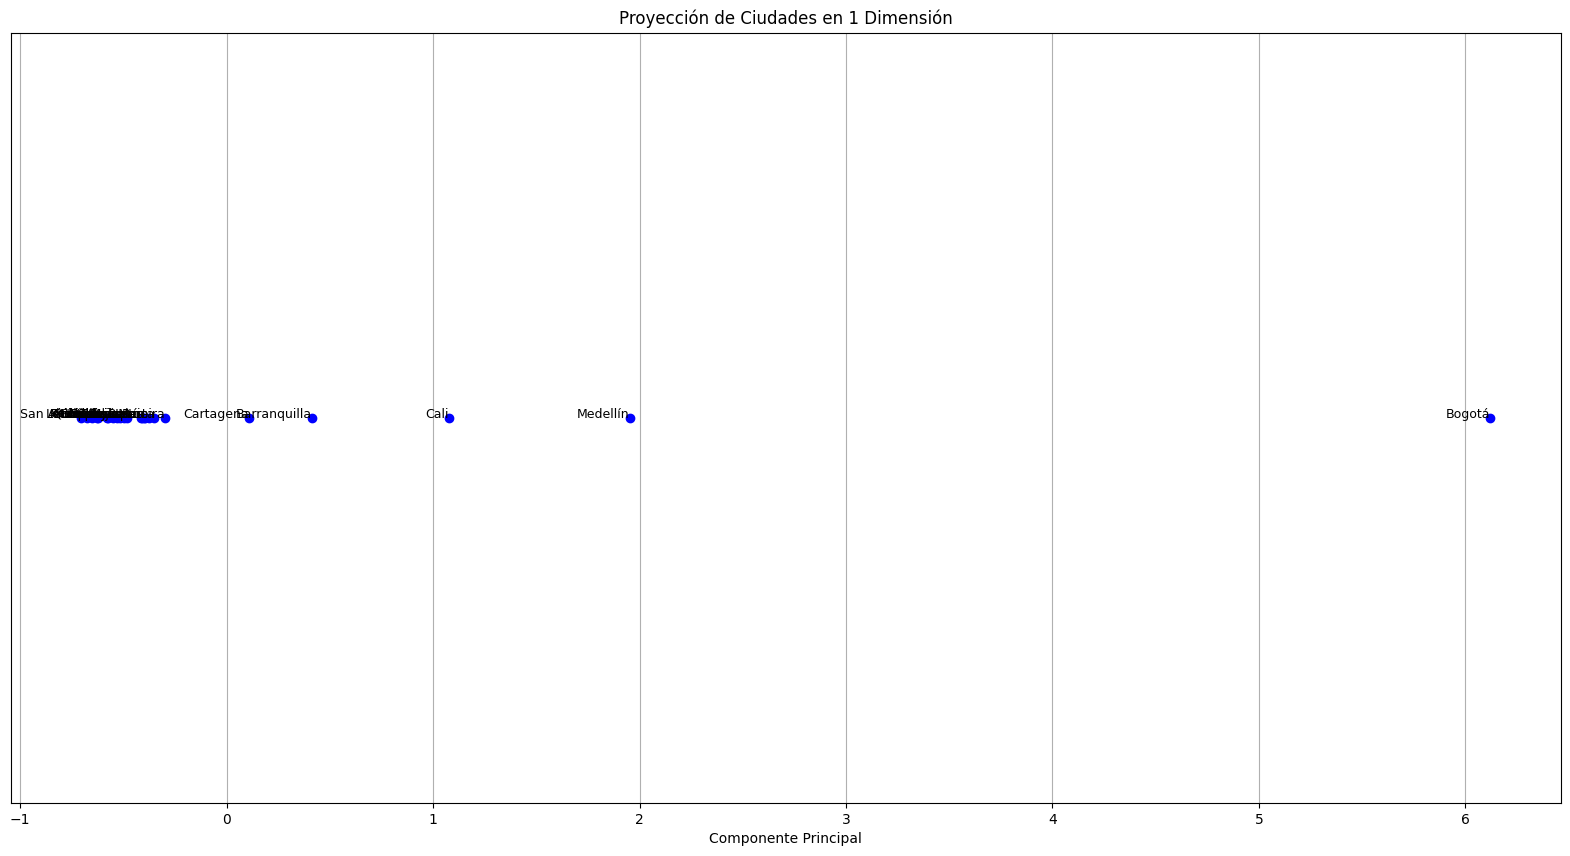

In [21]:
ciudades = df['City']

# Crear el gráfico para visualizar las ciudades en 1 dimensión
plt.figure(figsize=(20, 10))
plt.scatter(datos_reducidos, [0]*len(datos_reducidos), c='blue', marker='o')

# Añadir etiquetas para cada ciudad
for i, ciudad in enumerate(ciudades):
    plt.text(datos_reducidos[i], 0, ciudad, fontsize=9, ha='right')

# Configuración del gráfico
plt.title('Proyección de Ciudades en 1 Dimensión')
plt.xlabel('Componente Principal')
plt.yticks([])  # Eliminar el eje y ya que estamos en una dimensión
plt.grid(True)
plt.show()

**2.8. Utilizar python par apintar todas las ciudades en 2 dimensiones,**

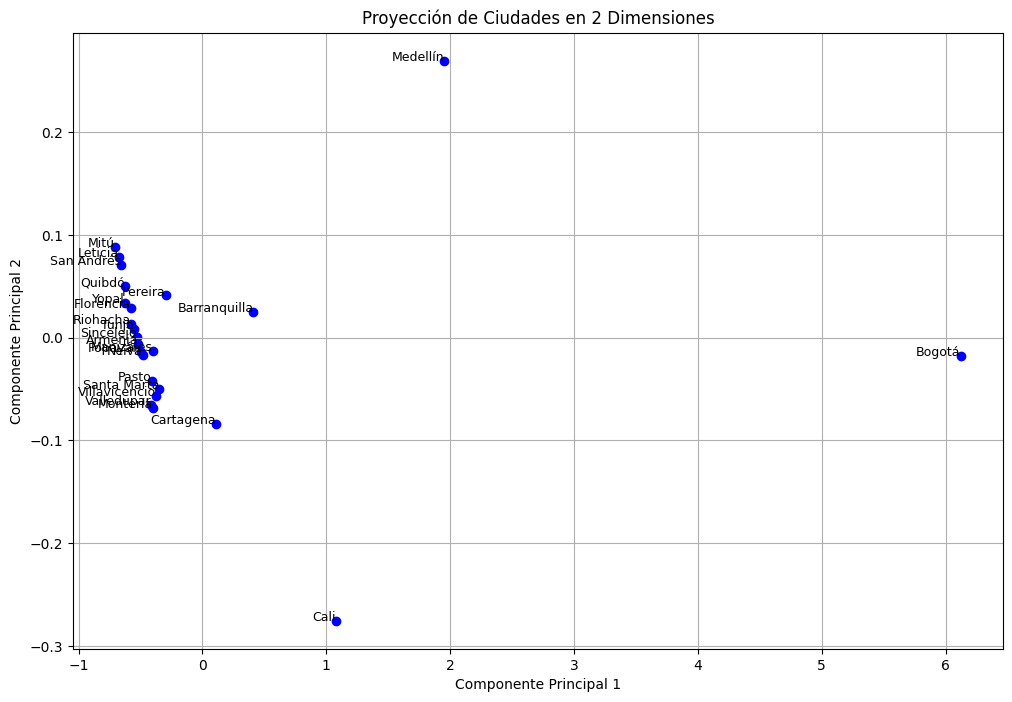

In [22]:
# Aplicar PCA para reducir a 2 dimensiones
pca = PCA(n_components=2)
datos_reducidos = pca.fit_transform(datos_normalizados)

# Crear el gráfico para visualizar las ciudades en 2 dimensiones
plt.figure(figsize=(12, 8))  # Aumenta el tamaño de la figura
plt.scatter(datos_reducidos[:, 0], datos_reducidos[:, 1], c='blue', marker='o')

# Añadir etiquetas para cada ciudad
for i, ciudad in enumerate(ciudades):
    plt.text(datos_reducidos[i, 0], datos_reducidos[i, 1], ciudad, fontsize=9, ha='right')

# Configuración del gráfico
plt.title('Proyección de Ciudades en 2 Dimensiones')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.grid(True)
plt.show()

**3. PCA**
En este punto toca descargar un archivo, y damos un set de entrenamiento, luego empezamos a desarrollar las preguntas:

In [23]:

def download_files():
    """
    Este método descarga los archivos de imágenes si no existen.
    """
    # Crear la carpeta 'data' si no existe
    if not os.path.exists("data"):
        os.makedirs("data")
    
    path_tar = os.path.join("data", 'faces.zip')
    if not isfile(path_tar):
        urlretrieve(
            'http://courses.media.mit.edu/2002fall/mas622j/proj/faces/rawdata.zip',
            path_tar)
    dest_path = "data/faces"
    with zipfile.ZipFile(path_tar) as tar:
        tar.extractall(dest_path)
        tar.close()

download_files()

entrenamiento = [1855,4729,3954,2886,3168,4943,2288,2872,5059,2618,3365,1432,5092,4140,1600,4372,3157,2085,1264,4716,3533,3701,4524,1290,2415,2627,3391,2243,4988,5066,4386,2071,2875,2049,4944,
                 4178,3953,2881,1638,1852,3739,4381,3998,2076,3396,2244,5061,2620,1899,1297,2412,3706,4523,1263,4711,3534,1607,4375,3150,2082,3362,1435,5095,4147,4986,5068,4388,2843,3991,2629,
                 1890,4718,1864,4972,3965,3159,2616,2424,2040,3192,4185,5057,2272,2888,3166,1631,4343,1403,4171,2286,3354,4515,3730,3502,1255,4727,1609,3962,4975,4149,3708,1863,1897,1299,2844,
                 3996,2078,3398,4981,3505,1252,4720,4512,3737,1404,4176,2281,3353,3161,1636,4344,4182,5050,2275,2047,3195,2423,2611,3763,4546,4774,3551,2483,4310,1662,3135,3909,3307,4122,1450,
                 1696,2013,2221,3797,2645,4780,2477,4921,3338,3936,1239,1837,4579,2448,2810,5209,4787,2470,3790,2642,2226,5003,1691,2014,2828,3300,4125,4919,1457,4317,1665,3132,4773,3556,2484,
                 3764,4541,2817,2219,1830,2689,3569,3931,4328,4926,1468,5035,1495,2210,2022,5207,2446,3594,4583,2674,3560,4745,1237,4577,1839,2680,3752,4113,1461,3336,3104,3938,4321,1653,3799,
                 2479,1698,2821,3907,3309,4910,4548,1806,3103,4326,1654,4114,1466,4928,3331,4570,2687,3755,3567,4742,1230,4584,2673,2441,3593,2025,2819,5200,5032,1492,2217,3558,1801,1459,4917,
                 4319,3900,2228,2826,4789,1298,1896,3399,4980,2079,2845,3997,4148,4974,1608,3963,3709,1862,2046,3194,4183,5051,2274,2610,2422,4513,3736,3504,4721,1253,3160,4345,1637,4177,1405,
                 2280,3352,1865,4719,3158,3964,4973,4389,2842,3990,5069,4987,2628,1891,4170,1402,2287,3355,3167,2889,4342,1630,3503,4726,1254,4514,3731,2425,2617,4184,5056,2273,2041,3193,3952,
                 2880,1639,4179,4945,1853,3738,2048,2874,4710,1262,3535,3707,4522,3363,5094,4146,1434,4374,1606,3151,2083,3397,2245,5060,4380,2077,3999,1296,2413,2621,1898,5058,2873,2619,4728,
                 1854,4942,2289,3169,3955,2887,2626,1291,2414,4387,2070,3390,2242,5067,4989,4373,1601,3156,2084,3364,5093,4141,1433,3700,4525,4717,1265,3532,2440,3592,4585,2672,1493,5033,2216,
                 2818,2024,5201,1467,4929,4115,3330,3102,1655,4327,3566,1231,4743,4571,2686,3754,2827,2229,4788,1800,3559,4318,3901,1458,4916,4576,1838,2681,3753,3561,1236,4744,3939,3105,1652,
                 4320,1460,4112,3337,2023,5206,1494,5034,2211,4582,2675,2447,3595,3308,4911,3906,4549,1807,2478,3798,1699,2820,1664,4316,3133,3301,4918,1456,4124,3765,4540,4772,3557,2485,3791,
                 2643,4786,2471,1690,2829,2015,2227,5002,3568,1831,2688,4927,1469,3930,4329,2218,2816,2220,5005,1697,2012,4781,2476,3796,2644,4775,3550,2482,3762,1809,4547,3306,1451,4123,1663,
                 4311,3908,3134,2449,2811,5208,3937,4920,3339,1836,4578,1238,1944,4638,3079,2997,3845,4852,2399,2963,5148,2709,3274,4051,5183,1523,4263,1711,2194,3046,4607,1375,3422,3610,4435,
                 1381,2504,2736,2352,3280,5177,4899,4297,2160,2158,2964,4069,4855,2990,3842,1729,1943,3628,4290,2167,3889,2355,3287,5170,2731,1988,1386,2503,3617,4432,4600,1372,3425,4264,1716,
                 2193,3041,3273,5184,1524,5179,4897,4299,3880,2952,2738,1981,4609,1975,4863,3048,3874,2707,2535,3083,2151,5146,4094,2363,3077,2999,4252,1720,4060,1512,3245,2397,4404,3621,3413,
                 4636,1344,1718,3873,4058,4864,3619,1972,1986,1388,2169,3887,2955,3289,4890,3414,4631,1343,4403,3626,4067,1515,3242,2390,3070,4255,1727,5141,4093,2364,3084,2156,2532,2700,3672,
                 4457,1919,1317,4665,2592,3440,1773,4201,3818,3024,3216,1541,4033,1787,2102,2330,5115,2754,3686,4691,2566,4830,3229,3827,1328,4468,1926,2559,2901,4696,2561,2753,3681,2337,5112,
                 1780,2939,2105,3211,1546,4808,4034,1774,4206,3023,1310,4662,2595,3447,3675,4450,2906,2308,1921,2798,3478,3820,4239,1579,4837,1584,5124,2301,2133,3485,2557,4492,2765,3471,1326,
                 4654,1928,4466,3643,2791,1570,4002,3227,3829,3015,1742,4230,3688,2568,1789,2930,3816,3218,4801,1917,4459,1319,3012,1745,4237,4839,1577,4005,3220,4461,3644,2796,3476,1321,4653,
                 4495,2762,3482,2550,2908,2134,1583,5123,2306,3449,1910,4806,1548,4208,3811,2339,2937,4698,1389,1987,3288,4891,3886,2954,2168,4865,4059,1719,3872,3618,1973,3085,2157,5140,4092,
                 2365,2701,2533,4402,3627,3415,1342,4630,3071,1726,4254,1514,4066,3243,2391,1974,4608,3875,3049,4862,4298,3881,2953,4896,5178,2739,1980,1513,4061,3244,2396,2998,3076,1721,4253,
                 3412,1345,4637,4405,3620,2534,2706,5147,4095,2362,3082,2150,2991,3843,1728,4854,4068,1942,3629,2965,2159,1373,4601,3424,3616,4433,3272,1525,4057,5185,1717,4265,2192,3040,2354,
                 3286,5171,4291,3888,2166,1387,2502,2730,1989,5149,2962,2708,4639,1945,4853,2398,2996,3844,3078,2737,1380,2505,4296,2161,2353,3281,4898,5176,1710,4262,2195,3047,3275,1522,4050,
                 5182,3611,4434,1374,4606,3423,3483,2551,4494,2763,5122,1582,2307,2135,2909,4004,4838,1576,3221,3013,4236,1744,3477,4652,1320,4460,3645,2797,2936,2338,4699,1911,3448,4209,3810,
                 4807,1549,1929,4467,3642,2790,3470,4655,1327,3014,3828,4231,1743,4003,1571,3226,2132,5125,1585,2300,4493,2764,3484,2556,3219,4800,3817,1318,1916,4458,2569,3689,1788,2931,4207,
                 1775,3022,3210,4035,1547,4809,3674,4451,4663,1311,2594,3446,2752,3680,4697,2560,1781,2104,2938,2336,5113,3479,1920,2799,1578,4836,3821,4238,2309,2907,2331,5114,1786,2103,4690,
                 2567,2755,3687,4664,1316,2593,3441,3673,4456,1918,3217,4032,1540,4200,1772,3025,3819,2558,2900,3826]


**1. Calcular la mean face. Que es la cara con el promedio de los pixeles y visualizarla**

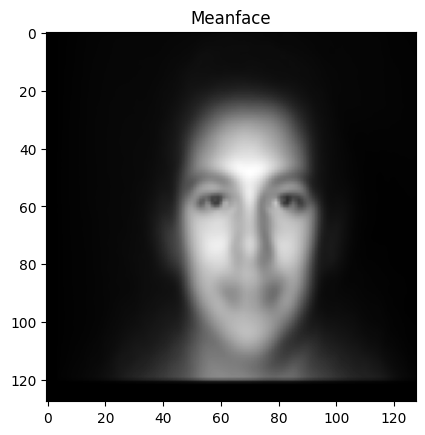

In [24]:
# Ruta de las imágenes
d_name = 'data/faces/rawdata'

# Cargar las imágenes de entrenamiento
def cargar_imagenes_entrenamiento(folder, lista_entrenamiento):
    X = []
    # Convertir la lista de números de entrenamiento a cadenas para comparar con los nombres de archivo
    nombres_entrenamiento = set(str(img_id) for img_id in lista_entrenamiento)

    for nfile in os.listdir(folder):
        if nfile in nombres_entrenamiento:  # Solo cargar imágenes que estén en la lista de entrenamiento
            try:
                with open(os.path.join(folder, nfile), "rb") as f:
                    bytesRead = f.read()
                    img = Image.frombytes('L', (128, 128), bytesRead)
                    X.append(np.array(img).flatten())  # Convertir a array 1D
            except Exception as e:
                print(f"Error al cargar la imagen {nfile}: {e}")
                
    return np.array(X)

# Paso 2: Mostrar imágenes
def plotOneImage(data, label="Image 1", ax=None):
    fnShape = lambda X: X.reshape(128, 128)
    fig = None
    if ax is None:
        fig, ax = plt.subplots(1, 1, constrained_layout=True)
    ax.imshow(fnShape(data), cmap='gray')
    ax.set_title(label=label)
    return fig, ax

def plotThreeImages(data, ix1, ix2, ix3):
    fnShape = lambda X: X.reshape(128, 128)
    fig, ax = plt.subplots(1, 3, constrained_layout=True)
    ax[0].imshow(fnShape(data[ix1]), cmap='gray')
    ax[0].set_title(f"Image {ix1}")
    ax[1].imshow(fnShape(data[ix2]), cmap='gray')
    ax[1].set_title(f"Image {ix2}")
    ax[2].imshow(fnShape(data[ix3]), cmap='gray')
    ax[2].set_title(f"Image {ix3}")
    plt.show()

# Calcular la meanface (cara promedio)
def calcular_meanface(imagenes):
    # Calcular el promedio a lo largo del eje 0 (promedio de cada pixel)
    meanface = np.mean(imagenes, axis=0)
    return meanface

# Mostrar la meanface
def mostrar_meanface(meanface):
    fnShape = lambda X: X.reshape(128, 128)
    plt.imshow(fnShape(meanface), cmap='gray')
    plt.title("Meanface")
    plt.show()

#cargar imaganes
images = cargar_imagenes_entrenamiento(d_name, entrenamiento)

# Mostrar algunas imágenes
# plotThreeImages(images, 1, 2, 3)

# Calcular y mostrar la meanface
meanface = calcular_meanface(images)
mostrar_meanface(meanface)


**2. Centrar los datos, utilizar PCA. ¿Cuántos componentes se deben utilizar para mantener el 95% de las características?. Crear una tabla para mostrar las primeras 5 caras utilizando, la mean face + los datos reconstruidos utilizando la primera componente, después con 3 componentes, después con las primeras 20 componentes, después con las componentes que explican el 95% de la varianza y por último con el numero de componentes que tiene el 99% de la varianza. ¿Qué se puede concluir de los resultados?**

Para esto entonces voy a solucionar punto por punto

**Centrar los datos y utilizar PCA**


In [25]:
# Paso 2: Centrar las imágenes restando la meanface
imagenes_centradas = images - meanface

# Paso 3: Aplicar PCA (manteniendo un número alto de componentes para explicar el 99% de la varianza)
pca = PCA(n_components=200)  # Puedes ajustar n_components si es necesario
XReduced = pca.fit_transform(imagenes_centradas)
eigenValues = pca.explained_variance_
eigenFaces = pca.components_

'''
def mostrar_eigenfaces(eigenFaces, num_faces=5):
    fnShape = lambda X: X.reshape(128, 128)
    fig, ax = plt.subplots(1, num_faces, figsize=(15, 5), constrained_layout=True)
    for i in range(num_faces):
        ax[i].imshow(fnShape(eigenFaces[i]), cmap='gray')
        ax[i].set_title(f"Eigenface {i+1}")
    plt.show()

mostrar_eigenfaces(eigenFaces)

'''



'\ndef mostrar_eigenfaces(eigenFaces, num_faces=5):\n    fnShape = lambda X: X.reshape(128, 128)\n    fig, ax = plt.subplots(1, num_faces, figsize=(15, 5), constrained_layout=True)\n    for i in range(num_faces):\n        ax[i].imshow(fnShape(eigenFaces[i]), cmap=\'gray\')\n        ax[i].set_title(f"Eigenface {i+1}")\n    plt.show()\n\nmostrar_eigenfaces(eigenFaces)\n\n'

Para saber el número de componentes necesarios puedo aprovechar y utilizar python

In [26]:
# Calcular la varianza acumulada
varianza_acumulada = np.cumsum(pca.explained_variance_ratio_)

# Encontrar el número de componentes necesarios para mantener al menos el 95% de la varianza
componentes_95 = np.argmax(varianza_acumulada >= 0.95) + 1

# Encontrar el número de componentes necesarios para mantener al menos el 99% de la varianza
componentes_99 = np.argmax(varianza_acumulada >= 0.99) + 1

print(f"Componentes necesarios para mantener el 95% de la varianza: {componentes_95}")
print(f"Componentes necesarios para mantener el 99% de la varianza: {componentes_99}")


Componentes necesarios para mantener el 95% de la varianza: 142
Componentes necesarios para mantener el 99% de la varianza: 1


Ya entonces puedo elaborar la tabla

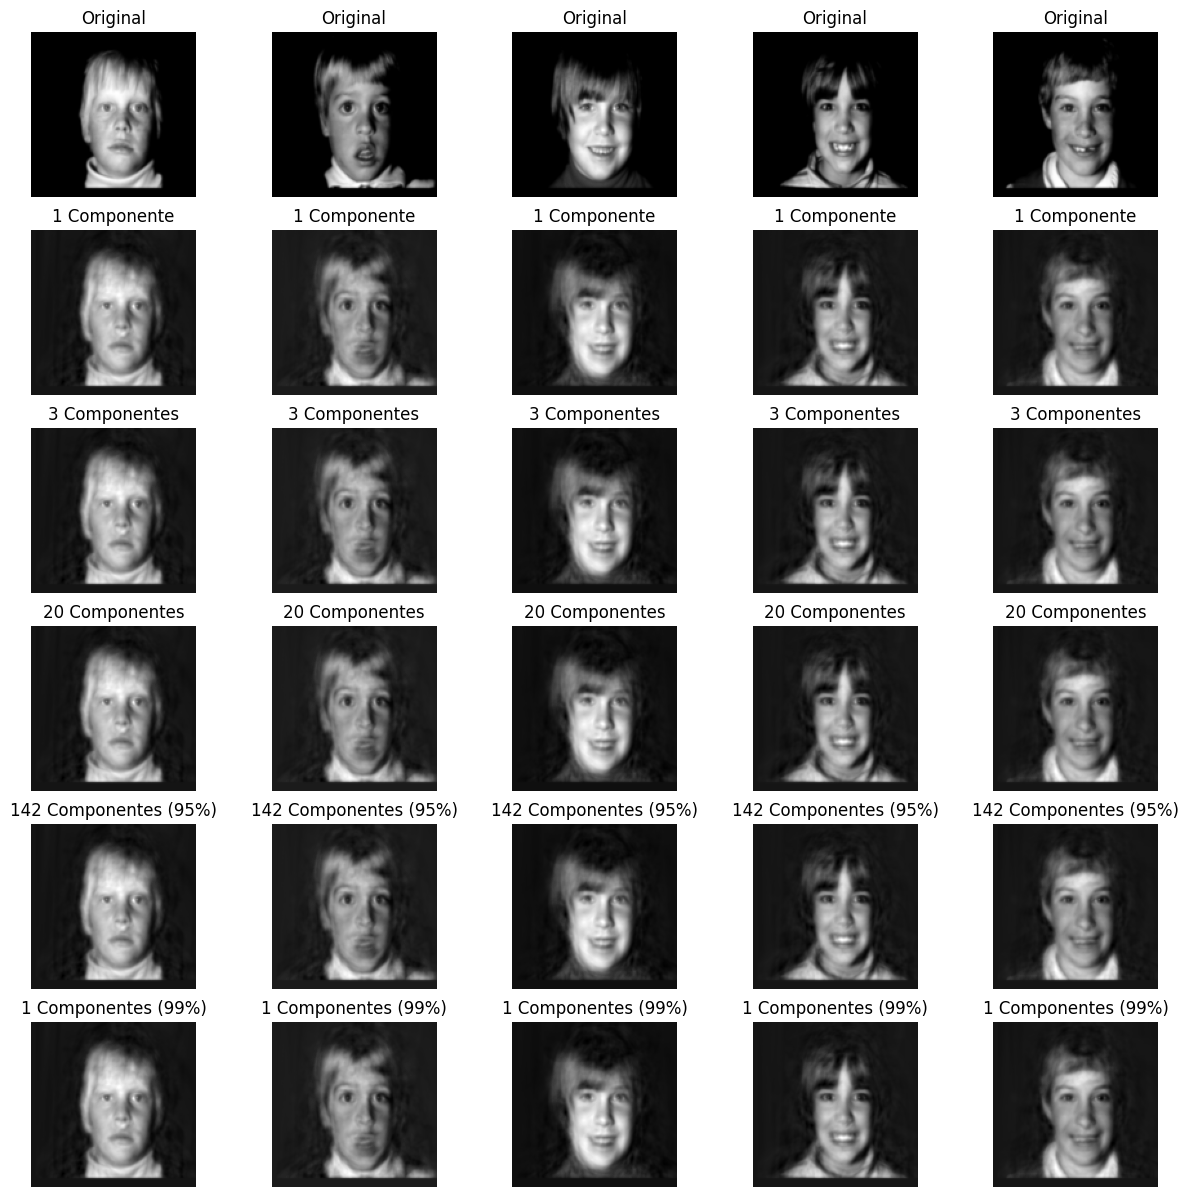

In [27]:


# Calcular la cantidad de componentes necesarios para explicar el 95% y el 99% de la varianza
varianza_acumulada = np.cumsum(pca.explained_variance_ratio_)
componentes_95 = np.argmax(varianza_acumulada >= 0.95) + 1
componentes_99 = np.argmax(varianza_acumulada >= 0.99) + 1

# Reconstruir las imágenes utilizando diferentes cantidades de componentes
def reconstruir_imagenes(pca, imagenes_centradas, cara_promedio, n_componentes):
    pca.n_components = n_componentes
    X_reducido = pca.transform(imagenes_centradas)
    X_reconstruido = pca.inverse_transform(X_reducido)
    return X_reconstruido + cara_promedio

# Reconstruir las imágenes con diferentes cantidades de componentes
reconstruido_1 = reconstruir_imagenes(pca, imagenes_centradas, meanface, 1)
reconstruido_3 = reconstruir_imagenes(pca, imagenes_centradas, meanface, 3)
reconstruido_20 = reconstruir_imagenes(pca, imagenes_centradas, meanface, 20)
reconstruido_95 = reconstruir_imagenes(pca, imagenes_centradas, meanface, componentes_95)
reconstruido_99 = reconstruir_imagenes(pca, imagenes_centradas, meanface, componentes_99)

# Visualizar las primeras 5 caras originales y reconstruidas
fig, ejes = plt.subplots(6, 5, figsize=(15, 15))
for i in range(5):
    ejes[0, i].imshow(images[i].reshape(128, 128), cmap='gray')
    ejes[0, i].set_title("Original")
    ejes[0, i].axis('off')
    
    ejes[1, i].imshow(reconstruido_1[i].reshape(128, 128), cmap='gray')
    ejes[1, i].set_title("1 Componente")
    ejes[1, i].axis('off')
    
    ejes[2, i].imshow(reconstruido_3[i].reshape(128, 128), cmap='gray')
    ejes[2, i].set_title("3 Componentes")
    ejes[2, i].axis('off')
    
    ejes[3, i].imshow(reconstruido_20[i].reshape(128, 128), cmap='gray')
    ejes[3, i].set_title("20 Componentes")
    ejes[3, i].axis('off')
    
    ejes[4, i].imshow(reconstruido_95[i].reshape(128, 128), cmap='gray')
    ejes[4, i].set_title(f"{componentes_95} Componentes (95%)")
    ejes[4, i].axis('off')
    
    ejes[5, i].imshow(reconstruido_99[i].reshape(128, 128), cmap='gray')
    ejes[5, i].set_title(f"{componentes_99} Componentes (99%)")
    ejes[5, i].axis('off')

plt.show()


¿Qué se puede concluir?

Como ya sabíamos desde clase, esto reduce la dimensión,  pero casi no pierde información, lo que provoca que visualmente a mí vista las imagenes tengan la misma calidad que la original, pero eso sí, las imágenes con la primera componente si sufren ya que pareciese ser un poco más borrosa, pero según la teoría debería:

1. Reducción de Dimensionalidad: PCA es una herramienta poderosa para la reducción de dimensionalidad, permitiendo representar datos de alta dimensión con un número reducido de componentes sin perder mucha información.
2. Compromiso entre Complejidad y Precisión: Hay un compromiso entre la cantidad de componentes utilizados y la precisión de la reconstrucción. Utilizar más componentes mejora la precisión, pero también aumenta la complejidad del modelo.
3. Eficiencia: Para muchas aplicaciones, utilizar un número de componentes que explique el 95% de la varianza puede ser suficiente, proporcionando un buen equilibrio entre eficiencia y precisión.

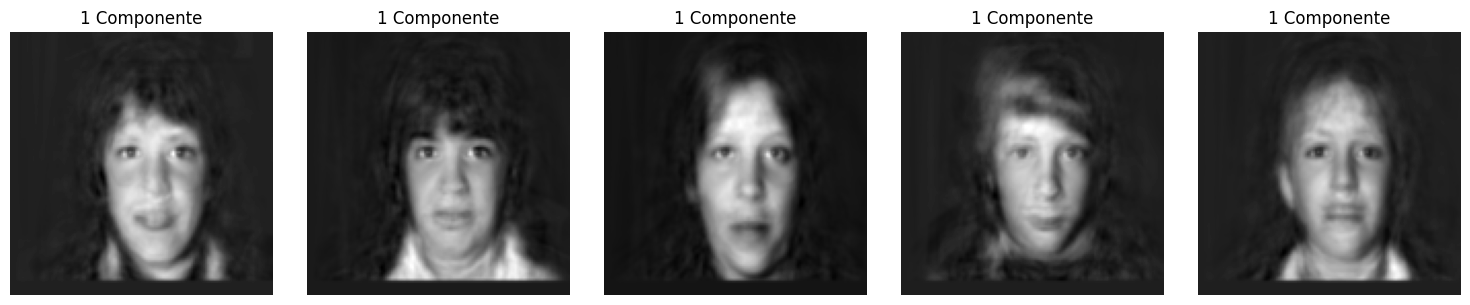

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Definir IDs de imágenes de testing
testing = [
    4831, 3228, 4469, 1927, 1329, 5109, 2922, 2748, 4679, 1905, 4813, 3038, 3804, 2777, 4480, 
    3497, 2545, 2121, 2313, 5136, 1596, 4222, 1750, 3007, 3235, 4010, 1562, 3651, 2783, 4474, 
    4646, 1334, 3463, 3803, 1768, 4028, 4814, 1902, 3669, 2589, 2119, 2925, 4641, 1333, 3464, 
    3656, 2784, 4473, 3232, 4017, 1565, 4225, 1757, 3000, 2314, 5131, 1591, 2126, 3490, 2542, 
    2770, 4487, 1934, 4648, 3009, 3835, 4822, 2913, 5138, 1598, 2779, 3499, 4021, 1553, 3204, 
    3036, 4213, 1761, 2580, 3452, 4677, 1305, 4445, 3660, 2574, 4683, 2746, 3694, 5107, 2322,
    2110, 1795, 4489, 2128, 2914, 4019, 4825, 1759, 3832, 3658, 1933, 2117, 1792, 5100, 2325, 
    2741, 3693, 2573, 4684, 4442, 3667, 2587, 3455, 4670, 1302, 3031, 4214, 1766, 4026, 1554, 
    3203, 2371, 5154, 4086, 3091, 2143, 2527, 2715, 1356, 4624, 3401, 3633, 4416, 1958, 3257, 
    2385, 1500, 4072, 1732, 4240, 3859, 3065, 1993, 2518, 3892, 2940, 4885, 3866, 2188, 4871, 
    3268, 4429, 1967, 1369, 1735, 4247, 3062, 3250, 2382, 1507, 4849, 4075, 3634, 4411, 1351, 
    4623, 3406, 2712, 2520, 2978, 3096, 2144, 2376, 5153, 4081, 3439, 1960, 1538, 4876, 5198, 
    3861, 4278, 4882, 2349, 3895, 2947, 1994, 1969, 4427, 3602, 3430, 1367, 4615, 3868, 2186, 
    3054, 1703, 4271, 1531, 4043, 5191, 3266, 2172, 4285, 5165, 2340, 3292, 2724, 2516, 1393, 
    3259, 4840, 2985, 3857, 1358, 1956, 4418, 2529, 4088, 2971, 2511, 1394, 2723, 5162, 2347, 
    3295, 2949, 2175, 4282, 4878, 1536, 4044, 5196, 3261, 2181, 3053, 1704, 4276, 3437, 1360, 
    4612, 4420, 3605, 2976, 3098, 2378, 1951, 3408, 4249, 2982, 3850, 4847, 1509, 1758, 3833, 
    4824, 4018, 3659, 1932, 4488, 2915, 2129, 2586, 3454, 1303, 4671, 4443, 3666, 1555, 4027, 
    3202, 3030, 1767, 4215, 5101, 2324, 2116, 1793, 2572, 4685, 2740, 3692, 1599, 5139, 2912, 
    3498, 2778, 4649, 1935, 4823, 3834, 3008, 2747, 3695, 2575, 4682, 2111, 1794, 5106, 2323
]

# Definir la ruta de la carpeta de imágenes
carpeta_imagenes = 'data/faces/rawdata'

# Inicializar una lista para almacenar las imágenes de testing
images = cargar_imagenes_entrenamiento(carpeta_imagenes, testing)

# Función para centrar imágenes
def centrar_imagenes(imagenes, cara_media):
    return imagenes - cara_media

# Función para proyectar las imágenes en el espacio PCA
def proyectar_imagenes_pca(imagenes, eigen_caras):
    return np.dot(imagenes, eigen_caras.T)

# Centrar las imágenes de prueba
imagenes_prueba_centradas = centrar_imagenes(images, meanface)

# Proyectar las imágenes de prueba en el espacio PCA utilizando las componentes del PCA entrenado
imagenes_prueba_reducidas = proyectar_imagenes_pca(imagenes_prueba_centradas, eigenFaces)

# Extraer el primer componente para cada imagen de prueba
firstComponent = imagenes_prueba_reducidas[:, 0]

# Reconstruir imágenes con 1 componente
reconstruido_1 = reconstruir_imagenes(pca, imagenes_prueba_centradas, meanface, 1)

# Número de imágenes a mostrar (en este caso 5)
num_imagenes = 5

# Visualizar las primeras 5 caras reconstruidas con 1 componente
fig, ejes = plt.subplots(1, num_imagenes, figsize=(15, 3))

# Mostrar solo las imágenes reconstruidas
for i in range(num_imagenes):
    ejes[i].imshow(reconstruido_1[i].reshape(128, 128), cmap='gray')
    ejes[i].set_title("1 Componente")
    ejes[i].axis('off')

# Ajustar los espacios entre los subplots
plt.tight_layout()
plt.show()

# Crear un DataFrame con los resultados
df_submission = pd.DataFrame({
    'id': testing,
    'label': firstComponent
})

# Guardar el archivo de envío en formato CSV
df_submission.to_csv('pca_jose_miguel.csv', index=False)


**4. Utilizando el dataset del amazon data/amazon_products.csv crear: Utilizar la librería de plotly**

Antes de empezar a desarrollar los ejercicios correspondientes, lo primero es leer el archivo

In [29]:
# Cargar el archivo CSV
df = pd.read_csv('amazon_product.csv')


**4.1.1. Para las variables categóricas un gráfico de barras. Categoría numero de observaciones**

Para poder desarrollar este punto, entonces lo primero es analizar qué tipos de datos tiene el dataset, ya como esta vez no toca realizar todo a mano, puedo utilizar dos métodos, uno es visualizar la tabla y el otro es validar mediante código, para luego analizar y decidir

In [30]:
print(df.head(0))
df.dtypes

# Verificar si una columna es categórica basada en los valores únicos
for column in df.columns:
    unique_values = df[column].nunique()
    if unique_values < 10:  # Puedes ajustar este umbral
        print(f"Columna '{column}' podría ser categórica, tiene {unique_values} valores únicos.")
    else:
        print(f"Columna '{column}' no parece categórica, tiene {unique_values} valores únicos.")

Empty DataFrame
Columns: [Unnamed: 0, asin, product_title, product_price, product_original_price, currency, product_star_rating, product_num_ratings, product_url, product_photo, product_num_offers, product_minimum_offer_price, is_best_seller, is_amazon_choice, is_prime, climate_pledge_friendly, sales_volume, delivery, has_variations, product_availability, unit_price, unit_count]
Index: []

[0 rows x 22 columns]
Columna 'Unnamed: 0' no parece categórica, tiene 64 valores únicos.
Columna 'asin' no parece categórica, tiene 64 valores únicos.
Columna 'product_title' no parece categórica, tiene 64 valores únicos.
Columna 'product_price' no parece categórica, tiene 46 valores únicos.
Columna 'product_original_price' no parece categórica, tiene 27 valores únicos.
Columna 'currency' podría ser categórica, tiene 1 valores únicos.
Columna 'product_star_rating' no parece categórica, tiene 15 valores únicos.
Columna 'product_num_ratings' no parece categórica, tiene 53 valores únicos.
Columna 'prod

Acá ya podemos ver las variables categóricas, pero hay algunas que no nos ofrecen ninguna información útil para desarrollar el punto, entonces voy a decir cuales son las categóricas que siento que tiene utilidad utilizar para graficar

- asin = aunque es categórica, solo es la etique o identificador de cada producto
- product_title = tampoco me ofrece información interesante para graficarla
- currency = Al ver el excel noto que todos se expresan con dolares, entonces la verdad no vale la pena realizar un grafico ya que si o sí va encontrar 64 datos
- **product_star_rating = Si lo utilziaré**
- product_url = no lo utilizaré ya que tiene 64 valores únicos, entonces el gráfico no sería muy util que digamos
- product_photo = tampoco lo usaré por el mismo motivo
- **is_best_seller = Si lo utilizaré**
- **is_amazon_choice = Si lo utilizaré**
- **is_prime = Si lo utilizaré**
- **climate_pledge_friendly = Si lo utilizaré**
- **delivery = Si lo utilizaré**
- **has_variations = Si lo utilizaré**
- product_availability = podría ser categórico, pero no lo utilizaré por que solo tiene un dato, pero dado el caso en que si tuviese más datos, podría ya decir que si dice que tiene más de un producto disponible lo tome como true, y si no pues false, y ya con esto lo categorizaba



In [31]:
# Supongamos que tu DataFrame se llama df
categoricas = ['product_star_rating', 'is_best_seller', 'is_amazon_choice', 'climate_pledge_friendly', 'delivery', 'has_variations']

# Crear gráficos de barras para cada columna categórica
for columna in categoricas:
    conteo = df[columna].value_counts().reset_index()
    conteo.columns = [columna, 'Número de observaciones']
    fig = px.bar(conteo, x=columna, y='Número de observaciones', title=f'Número de observaciones en {columna}')
    fig.show()

**4.1.2. Para las variables numéricas crear histogramas. Listar los productos que están más lejos de 5 estándares de desviación, y serían considerados outliers. Hacer test de si es una distribución normal o no.**

En este punto toca identificar cuales son las variables numéricas y ya pasar a desarrollar las preguntas:

Las numéricas son: product_price, product_original_price, product_num_ratings, product_num_offers, product_minimum_offer_price, sales_volume, unit_price, unit_count

Lo primero es formatear los datos para que sean numéricos y no string

In [32]:

# Función para limpiar y convertir precios de texto a numérico (eliminando símbolos)
def limpiar_precio(precio):
    if isinstance(precio, str):
        return float(precio.replace('$', '').replace(',', '')) if precio else None
    return precio

# Función para limpiar y convertir el volumen de ventas a numérico
def limpiar_ventas(venta):
    # Verificamos si el texto es nulo o no es una cadena
    if not isinstance(venta, str):
        return 1000
    
    # Usamos una expresión regular para encontrar el número seguido de 'K+'
    match = re.search(r'(\d+)K\+', venta)
    if match:
        # Convertimos el número encontrado a entero y lo multiplicamos por 1000
        numero = int(match.group(1)) * 1000
        return numero
    else:
        # Si el formato no es el esperado, devolvemos 1000
        return 1000


# Cargar el archivo CSV
data = pd.read_csv('amazon_product.csv')



# Crear histogramas para cada variable numérica
columnas_numericas = ['product_price', 'product_original_price', 'product_num_ratings', 
                      'product_num_offers', 'product_minimum_offer_price', 'sales_volume']


# Limpiar columnas relevantes
data['product_price'] = data['product_price'].apply(limpiar_precio)
data['product_original_price'] = data['product_original_price'].apply(limpiar_precio)
data['product_minimum_offer_price'] = data['product_minimum_offer_price'].apply(limpiar_precio)
data['sales_volume'] = data['sales_volume'].apply(limpiar_ventas)
print("****")
print(data[columnas_numericas].head(50))



for columna in columnas_numericas:
    fig = px.histogram(data, x=columna, nbins=20, title=f"Histograma de {columna}")
    fig.show()

****
    product_price  product_original_price  product_num_ratings  \
0           99.99                  169.99                 2929   
1          149.74                  158.00                  135   
2           49.88                     NaN                  205   
3          335.00                  499.00                 2248   
4          199.99                     NaN                  423   
5          129.99                  137.65                  578   
6          349.99                  399.99                  109   
7           49.39                     NaN                 2771   
8           87.10                  105.00                  613   
9          129.99                  149.99                   94   
10          70.61                   87.14                  462   
11          48.75                   56.95                26685   
12          99.99                     NaN                    8   
13         499.00                  699.00                 2098   
14   

Ya ahora es listar los productos que cumplen las condiciones, pero lo voy a realizar con el precio del producto

In [33]:

# Función para calcular límites superior e inferior usando desviaciones estándar
def calcular_limites_std(data, columna, num_std=5):
    media = data[columna].mean()
    std_dev = data[columna].std()
    
    limite_superior = media + num_std * std_dev
    limite_inferior = media - num_std * std_dev
    
    return limite_inferior, limite_superior

# Función para detectar outliers basados en los límites calculados
def detectar_outliers(data, columna, limites):
    limite_inferior, limite_superior = limites
    # Identificar los outliers fuera de los límites
    outliers = data[(data[columna] > limite_superior) | (data[columna] < limite_inferior)]
    
    return outliers


# Calcular límites y detectar outliers para la columna 'product_price'
limites = calcular_limites_std(data, 'product_price')
outliers = detectar_outliers(data, 'product_price', limites)

# Mostrar los outliers encontrados
print("Outliers en product_price:")
if not outliers.empty:
    print(outliers[['product_title', 'product_price']], "\n")
else:
    print("No se encontraron outliers en product_price\n")


Outliers en product_price:
No se encontraron outliers en product_price



Realizar el test de distribución normal

In [34]:
# Realizar prueba de normalidad (Shapiro-Wilk test)
def prueba_normalidad(columna):
    datos_limpios = data[columna].dropna()  # Eliminar NaN antes de la prueba
    estadistico, p_valor = stats.shapiro(datos_limpios)
    return estadistico, p_valor

# Ejecutar prueba de normalidad para 'product_price'
estadistico, p_valor = prueba_normalidad('product_price')

print(f"Prueba de normalidad en 'product_price':")
print(f"Estadístico={estadistico}, p-value={p_valor}")

if p_valor < 0.05:
    print("La distribución de 'product_price' NO es normal")
else:
    print("La distribución de 'product_price' es normal")

Prueba de normalidad en 'product_price':
Estadístico=0.6241336627911438, p-value=1.573030422468821e-11
La distribución de 'product_price' NO es normal


**4.2 Gráfico de la relación de cada variable con respecto al sales_volume (convertir a número)**

In [35]:
# Crear gráficos de dispersión usando Plotly
for columna in columnas_numericas:
    if columna != 'sales_volume':  # No graficar la relación de sales_volume consigo mismo
        fig = px.scatter(df, x=columna, y='sales_volume',
                         title=f'Relación entre {columna} y sales_volume',
                         labels={columna: columna, 'sales_volume': 'sales_volume'})
        fig.show()

**4.2.1.  Variables categóricas debes crear un boxplot. Explique cómo interpreta el gráfico**

Ya sabemos cuales son las variables categóricas que decidí que eran relevantes para hacerle un estudio


In [36]:
for variable in categoricas:
    fig = px.box(data, x=variable, y='sales_volume',
                 title=f'Distribución del Volumen de Ventas por {variable}',
                 labels={variable: variable, 'sales_volume': 'Volumen de Ventas'})
    fig.show()

Para hacer una interpretación rápida podemos decir varias cositas, como por ejemplo:

- Los productos con caificaciones entre 4 y 5 estrellas tienden a tener volúmenes de ventas más altos y si hablamos de manera más exacta, entre 4.5 y 5 tienen un volúmen más alto
- Podríamos inferir que los productos con calificaciones menores a 4 tienden a tener volúmenes bajos, y que en la calificación de 4.7 tiene un outlier
- Vemos que por volúmenes de venta los products best sellers tienen outliers  en altos, pero es algo esperable ya que el etiquetado lo insinua
- La barra correspondiente a “true” de los productos de amazon choice muestra ventas concentradas en números más altos, lo que indica que los productos con la etiqueta “Amazon’s Choice” tienden a vender más. Además puede ser interesante revisar los outliers ya que productos con la etiqueta false que vendan más de 100k puede servir para proyecciones futuras
- Los productos etiquetados como “climate pledge friendly” true tienen un volumen de ventas significativamente mayor en comparación con los que no tienen esta etiqueta
- La barra para “false” tiene varias marcas pequeñas que indican puntos de datos dispersos, sugiriendo una mayor variabilidad en las ventas de productos que no son “climate pledge friendly”.


**4.2.2. Variables numéricas vas a crear un scatter plot.Explique cómo interpreta el gráfico**


In [37]:
# Crear el scatter plot
fig = px.scatter(data, x='product_price', y='sales_volume',
                 title='Relación entre Precio del Producto y Volumen de Ventas',
                 labels={'product_price': 'Precio del Producto', 'sales_volume': 'Volumen de Ventas'},
                 color='product_star_rating', 
                 hover_data=['product_star_rating'])
fig.show()

**4.3. Matriz de correlación**

**4.3.1.  Cree la matriz de correlación, cuales son las variables más importantes para explicar la variabilidad de las sales_volume. Explique por qué el coeficiente es negativo o positivo.**


In [38]:
# Crear la matriz de correlación
matriz_correlacion = data[['product_price', 'product_original_price', 'product_num_ratings', 
                           'product_num_offers', 'product_minimum_offer_price', 'sales_volume']].corr()

print(matriz_correlacion)

                             product_price  product_original_price  \
product_price                     1.000000                0.989061   
product_original_price            0.989061                1.000000   
product_num_ratings              -0.190693               -0.232485   
product_num_offers                0.276812                0.171946   
product_minimum_offer_price       0.993766                0.983522   
sales_volume                     -0.051101               -0.087134   

                             product_num_ratings  product_num_offers  \
product_price                          -0.190693            0.276812   
product_original_price                 -0.232485            0.171946   
product_num_ratings                     1.000000           -0.103248   
product_num_offers                     -0.103248            1.000000   
product_minimum_offer_price            -0.200342            0.274725   
sales_volume                           -0.077101           -0.105832   

    

Como vimos en clase y expliqué en los primeros puntos, toca analizar que tan cerca están de -1, 1 y 0 para poder dar sentido a la interpretación.
Por ejemplo, si encuentras que product_price tiene una alta correlación positiva con sales_volume (por ejemplo, 0.8), esto sugiere que a medida que el precio del producto aumenta, también lo hace el volumen de ventas. Esto podría ser porque los productos más caros podrían estar asociados con un mayor interés o calidad percibida, lo que lleva a más ventas.

Si product_original_price tiene una correlación negativa con sales_volume (por ejemplo, -0.6), podría significar que los productos con precios originales más altos tienden a tener menos volumen de ventas, tal vez debido a que los consumidores encuentran estos productos menos accesibles o atractivos.

**4.3.2. Cree las dummy variables para todas las variables categóricas y genere la matriz de correlación nuevamente. ¿Cuál es el valor de variable categórica con mayor correlación?**

In [39]:
# Crear variables dummy para variables categóricas
categoricas = ['product_star_rating', 'is_best_seller', 'is_amazon_choice', 'climate_pledge_friendly', 'delivery', 'has_variations']
data_dummies = pd.get_dummies(data[categoricas])

# Combinar variables dummy con variables numéricas
data_completa = pd.concat([data[['product_price', 'product_original_price', 'product_num_ratings', 
                                 'product_num_offers', 'product_minimum_offer_price', 'sales_volume']], 
                            data_dummies], axis=1)

# Crear la nueva matriz de correlación
matriz_correlacion_nueva = data_completa.corr()

# Encontrar la variable categórica con mayor correlación con 'sales_volume'
correlaciones_sales_volume = matriz_correlacion_nueva['sales_volume']
variable_max_correlation = correlaciones_sales_volume.drop('sales_volume').idxmax()
valor_max_correlation = correlaciones_sales_volume[variable_max_correlation]

print(f"La variable categórica con mayor correlación con 'sales_volume' es '{variable_max_correlation}' con un valor de {valor_max_correlation:.2f}")

La variable categórica con mayor correlación con 'sales_volume' es 'delivery_FREE delivery' con un valor de 0.50
